![slide-1](../presentations/slides/s1.png)

![slide-2](../presentations/slides/s2.png)

![slide-3](../presentations/slides/s3.png)

![slide-4](../presentations/slides/s4.png)

![slide-5](../presentations/slides/s5.png)

# Jupyter Notebook demo

### Table of contenct:

- Cells  
    - markdown 
    - code cell 
- Running BASH Commands  
- Mixing two languages together
- Jupyter magics  
    - loading external code  
    - execute Python code from outside notebook  
- Timing the excution of a code within a cell or a function 
- Writting formulae in Latex 
- Adding link  
- Adding image  
- Embeding videos
- Styling the output of a Pandas dataframe
- A small cancer incidence vs. mortality analysis

## Cells

This is a markdown cell

In [2]:
## This is a code cell 
(0.1 + 0.2)  == 0.3

False

## Running BASH commands

In [4]:
! echo hello world.  ## provided that the OS supports BASH

hello world.


In [5]:
!ls  ## listing the contents of the current working directory 

external_code.py  reproducible_research.ipynb


## Mixing two languages together (here BASH and Python)

In [6]:
data_path = '../data/'
print(data_path)  ## data path is a Python variable

../data/


In [7]:
!ls $data_path    ## using Python variable as argument to BASH command

incidence_per_100k_age_standardized.xlsx
mortality_per_100k_age_standardized.xlsx


In [8]:
files = !find $data_path -maxdepth 1 -mindepth 1 -iname '*.xlsx' ## run BASH command and save results in Python variable
files

['../data/incidence_per_100k_age_standardized.xlsx',
 '../data/mortality_per_100k_age_standardized.xlsx']

##  Magic (some examples)

`%` denotes line magic  
`%%` denotes cell magic

### loading external code

In [ ]:
%load external_code.py

In [ ]:
# %load external_code.py
print('Hello world!')


### Execute Python code from outside notebook

In [ ]:
%run external_code.py

In [9]:
%run external_code.py

Hello world!


### Timing the excution of a code within a cell or a function

In [10]:
import numpy as np
%timeit np.sin(np.arange(0,46,1))

2.88 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%%time
for i in range(10**5):
    j = i**2

CPU times: user 31.3 ms, sys: 1.13 ms, total: 32.5 ms
Wall time: 31.4 ms


## Writting formulae in Latex

In [ ]:
$$E = mc^2$$

$$E = mc^2$$

In [ ]:
\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)

## Adding link

[reproducible_research](https://en.wikipedia.org/wiki/Reproducibility#Reproducible_research)

## Adding image

![UTA](https://research.uta.fi/pcrc/wp-content/uploads/sites/34/2017/06/cropped-uta_logo.png)

## Embeding videos

In [12]:
from IPython.display import YouTubeVideo

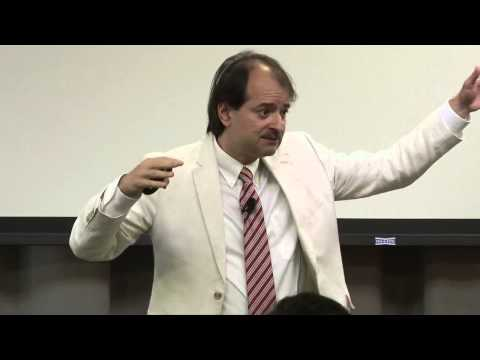

In [13]:
YouTubeVideo(id='GPYzY9I78CI', width=600, height=400)

## Styling the output of a Pandas dataframe

### Lest's say we want to highlight the min and max values in a dataframe

In [14]:
import pandas as pd
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

np.random.seed(777)
df = pd.DataFrame(np.random.randint(0, high=1500, size=24).reshape((4,6)), columns=list('abcdef'))

df.style.apply(highlight_max, axis=1).apply(highlight_min, axis=1)

,a,b,c,d,e,f
0,103,815,934,71,639,116
1,1447,985,814,792,1319,397
2,654,32,321,850,340,1349
3,577,1211,1127,1098,850,1342


## A small cancer incidence vs. mortality analysis

In [15]:
import matplotlib.pyplot as plt
from functools import lru_cache as cache
import ipywidgets as widgets
%matplotlib inline

data_path = '../data/'
incidence = pd.read_excel(data_path+'incidence_per_100k_age_standardized.xlsx', index_col='Area')
mortality = data = pd.read_excel(data_path+'mortality_per_100k_age_standardized.xlsx', index_col='Area')

@cache(None)
def stats(year):
    df = pd.concat([incidence[str(year)], mortality[str(year)]], axis=1)
    df.columns = ['incidence', 'mortality'] 
    return df

def draw_scatter(year):
    df = stats(year)
    regions = [s[0:3] for s in df.index.str.replace('\(uni. distr.\)', '').values.tolist()]
    fig = plt.figure(figsize=(14,7))
    plt.scatter(df.incidence, df.mortality, marker='H', s=600, c=['blue', 'green', 'pink', 'gray', 'orange'])
    plt.xlabel('cancer incidence', fontsize=18)
    plt.ylabel('cancer mortality', fontsize=18)
    plt.title('%s' %year, fontsize=20)
    plt.xlim(300, 670)
    plt.ylim(200, 370);
    ax = plt.gca()
    for i, r in enumerate(regions):
        ax.annotate(r, (df.incidence.values[i]+7, df.mortality.values[i]), fontsize=14)

## Visualization
for year in np.arange(1953, 2016):
    stats(year)

widgets.interact(draw_scatter, year=widgets.IntSlider(min=1953, max=2015, value=1953));

interactive(children=(IntSlider(value=1953, description='year', max=2015, min=1953), Output()), _dom_classes=('widget-interact',))